In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from scipy.spatial.distance import pdist, squareform
from ripser import ripser
import matplotlib.pyplot as plt


# from lecturerer 
import stablerank.srank as sr


## Data Handling

In [2]:
# Load dataset
df = pd.read_csv('Cancer_Data.csv')

In [3]:
# Check data types of each column
print(df.dtypes)

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [4]:
# Check for missing values in each column
print(df.isnull().sum())

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [5]:
# Drop 'id' column
df = df.drop('id', axis=1)

In [6]:
# Map 'diagnosis' column to numerical values
df['diagnosis'] = df['diagnosis'].map({'M': 1.0, 'B': 0.0})

In [7]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1.0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1.0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1.0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1.0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1.0,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1.0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1.0,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1.0,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## Data Exploration

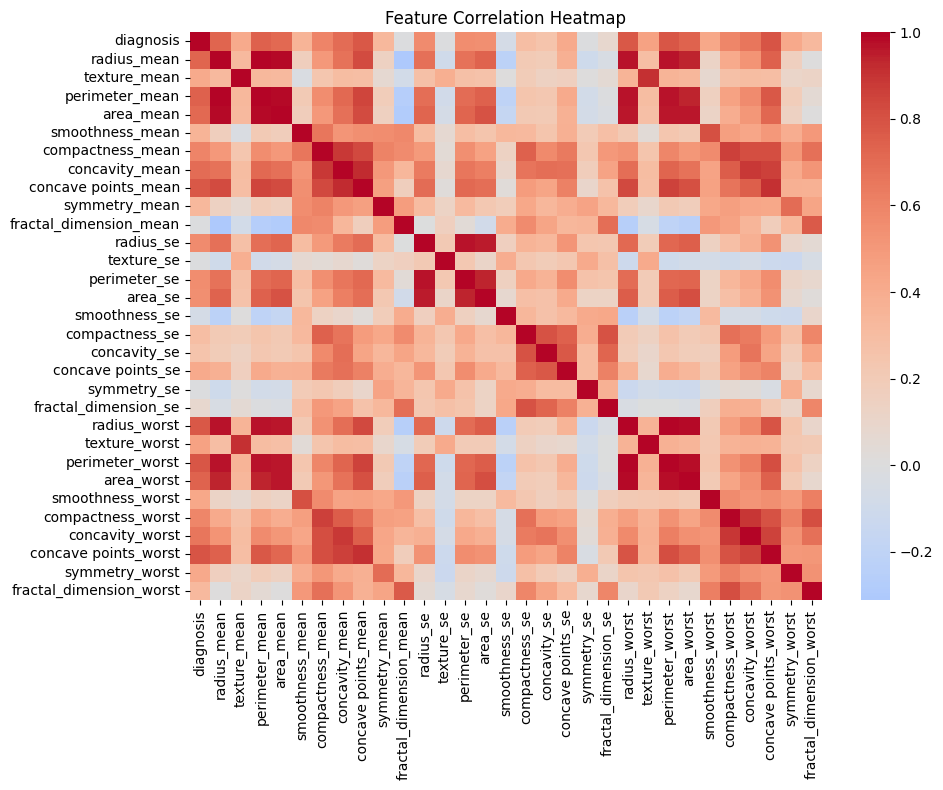

In [8]:
# Correlation between features
plt.figure(figsize=(10, 8))
correlation = df.corr()  # Drop id column
sns.heatmap(correlation, annot=False, cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()


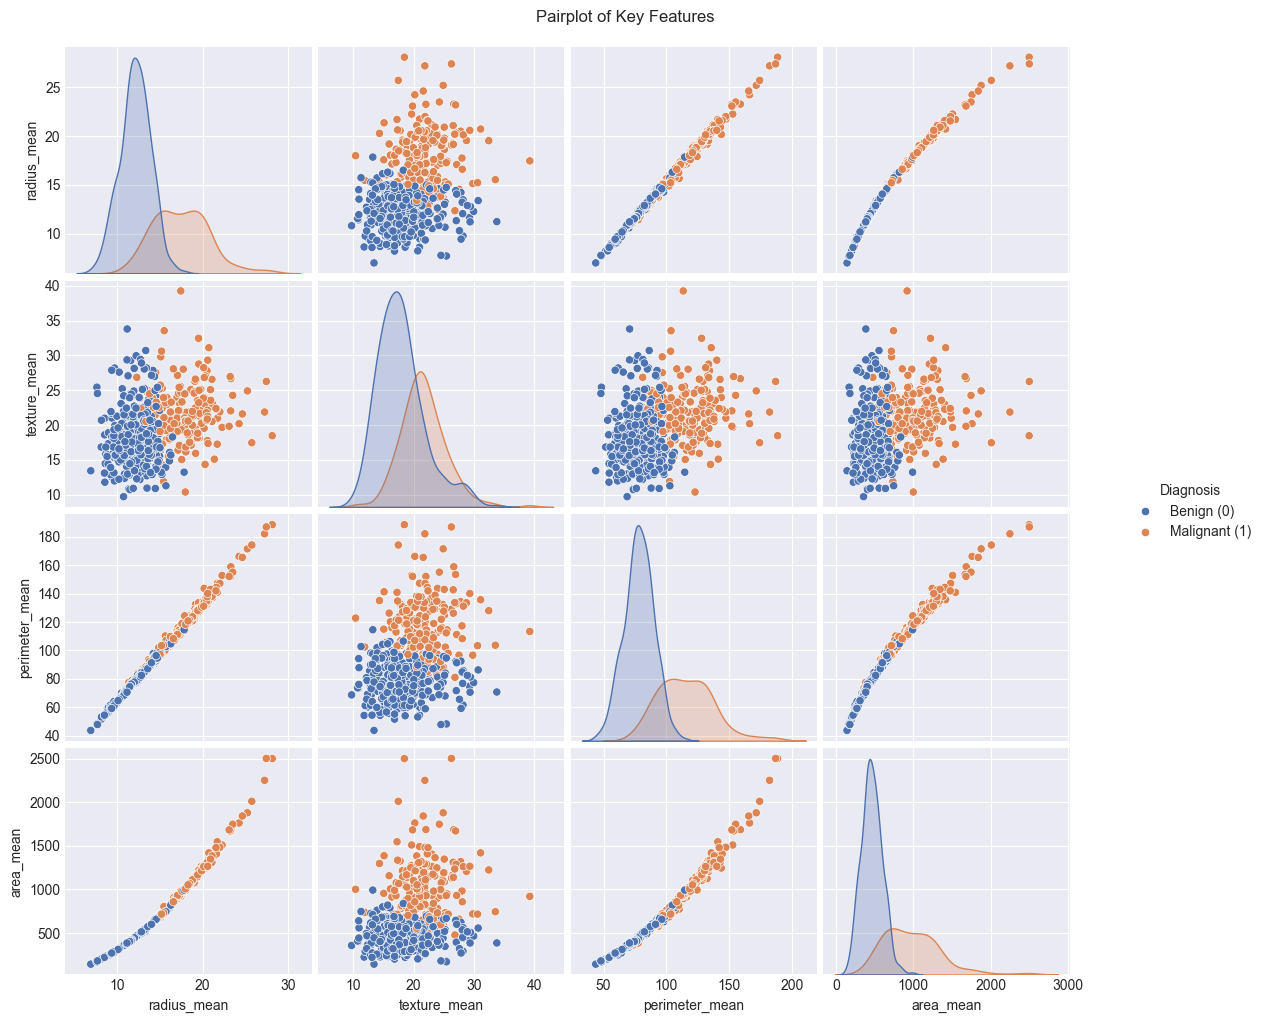

In [9]:
# Plot for key features
plt.style.use('seaborn-v0_8-darkgrid')

key_features = ['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean']
g = sns.pairplot(df[key_features], hue='diagnosis', palette='deep', height=2.5, aspect=1.2)
g._legend.set_title('Diagnosis')
for t, l in zip(g._legend.texts, ['Benign (0)', 'Malignant (1)']):
    t.set_text(l)

plt.suptitle('Pairplot of Key Features', y=1.02)
plt.subplots_adjust(right=0.85)  # Make room for legend
plt.show()

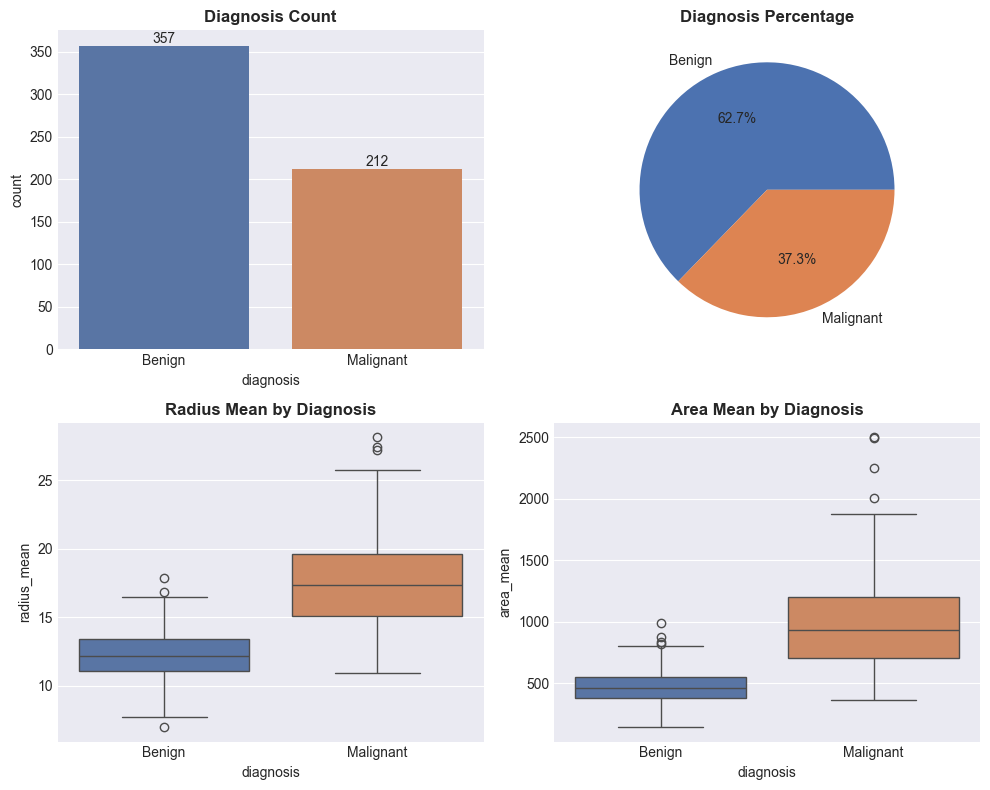

In [10]:
# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# 1. Count plot
sns.countplot(data=df, x='diagnosis', palette='deep', ax=axes[0, 0])
axes[0, 0].set_title('Diagnosis Count', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('diagnosis')
axes[0, 0].set_xticklabels(['Benign', 'Malignant'])
for container in axes[0, 0].containers:
    axes[0, 0].bar_label(container, fontsize=10)

# 2. Pie chart
counts = df['diagnosis'].value_counts().sort_index()
deep_colors = sns.color_palette('deep', 2)
counts.plot(kind='pie', 
            labels=['Benign', 'Malignant'],
            autopct='%1.1f%%',
            colors=deep_colors,  # Fixed: use color_palette to get actual colors
            ax=axes[0, 1])
axes[0, 1].set_title('Diagnosis Percentage', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('')

# 3. Boxplot - radius_mean
sns.boxplot(data=df, x='diagnosis', y='radius_mean', palette='deep', ax=axes[1, 0])
axes[1, 0].set_title('Radius Mean by Diagnosis', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('diagnosis')
axes[1, 0].set_xticklabels(['Benign', 'Malignant'])  # Fixed: was axes[1, 1]

# 4. Boxplot - area_mean
sns.boxplot(data=df, x='diagnosis', y='area_mean', palette='deep', ax=axes[1, 1])
axes[1, 1].set_title('Area Mean by Diagnosis', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('diagnosis')
axes[1, 1].set_xticklabels(['Benign', 'Malignant'])

plt.tight_layout()
plt.show()

## TDA

In [11]:
# Calculate z-scores
df_standardized = df.apply(stats.zscore)


In [12]:
"""from sklearn.decomposition import PCA

# Separate features and labels
X = df_standardized.drop('diagnosis', axis=1)
y = df_standardized['diagnosis']

# --- Apply PCA with 95% variance retention (for example) ---
pca = PCA(n_components=0.95, random_state=42)
X_pca = pca.fit_transform(X)

print(f"Original dimensions: {X.shape[1]}")
print(f"Reduced dimensions (95% variance): {X_pca.shape[1]}")
print(f"Variance retained: {pca.explained_variance_ratio_.sum():.4f}")

# --- OR manually find optimal number of components ---
pca_full = PCA()
pca_full.fit(X)

# Compute cumulative variance explained
cumsum = pca_full.explained_variance_ratio_.cumsum()
n_components_90 = (cumsum < 0.90).sum() + 1
n_components_95 = (cumsum < 0.95).sum() + 1

print(f"Components for 90% variance: {n_components_90}")
print(f"Components for 95% variance: {n_components_95}")

# Optional: visualize
import matplotlib.pyplot as plt
plt.plot(cumsum)

plt.axhline(0.95, linestyle='--', color='gray')
plt.xlabel('Number of components')
plt.ylabel('Cumulative variance explained')
plt.title('PCA Cumulative Variance')
plt.show()"""


'from sklearn.decomposition import PCA\n\n# Separate features and labels\nX = df_standardized.drop(\'diagnosis\', axis=1)\ny = df_standardized[\'diagnosis\']\n\n# --- Apply PCA with 95% variance retention (for example) ---\npca = PCA(n_components=0.95, random_state=42)\nX_pca = pca.fit_transform(X)\n\nprint(f"Original dimensions: {X.shape[1]}")\nprint(f"Reduced dimensions (95% variance): {X_pca.shape[1]}")\nprint(f"Variance retained: {pca.explained_variance_ratio_.sum():.4f}")\n\n# --- OR manually find optimal number of components ---\npca_full = PCA()\npca_full.fit(X)\n\n# Compute cumulative variance explained\ncumsum = pca_full.explained_variance_ratio_.cumsum()\nn_components_90 = (cumsum < 0.90).sum() + 1\nn_components_95 = (cumsum < 0.95).sum() + 1\n\nprint(f"Components for 90% variance: {n_components_90}")\nprint(f"Components for 95% variance: {n_components_95}")\n\n# Optional: visualize\nimport matplotlib.pyplot as plt\nplt.plot(cumsum)\n\nplt.axhline(0.95, linestyle=\'--\', colo

In [13]:
#DETTTA KAN VI NOG TA BOPORT EFTERSOM VI HAR GJORT DET I RIPSER


# Calculate Euclidean distances
distances = pdist(df_standardized, metric='euclidean')

# Convert to square matrix
distance_matrix = squareform(distances)



In [14]:
# Compute Vietoris-Rips persistence
result = ripser(df_standardized, maxdim=2, metric='euclidean')

# Extract persistence diagrams
diagrams = result['dgms']


# KOLLA DESSA PRINTS OCH SKRIV OM!!!!!!!!!!
print(f"H0 (connected components): {len(diagrams[0])} features")
print(f"H1 (loops): {len(diagrams[1])} features")
print(f"H2 (voids): {len(diagrams[2])} features")




H0 (connected components): 569 features
H1 (loops): 412 features
H2 (voids): 173 features


--- H0 ---
Number of features: 569
Birth range: 0.0000 – 0.0000
Death range: 1.0061 – inf
Average persistence: inf

--- H1 ---
Number of features: 420
Birth range: 1.5374 – 11.2944
Death range: 1.6170 – 11.4621
Average persistence: 0.1703

--- H2 ---
Number of features: 187
Birth range: 1.6937 – 8.4795
Death range: 1.7057 – 8.8362
Average persistence: 0.0743



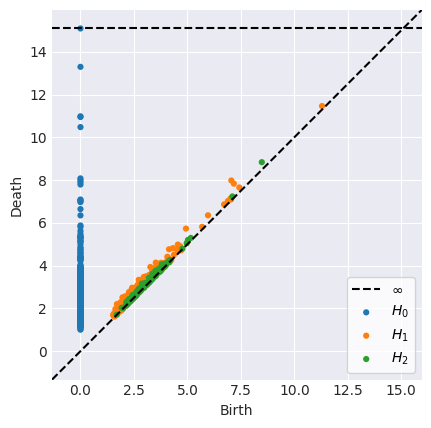

In [15]:
# KOLLAR OM H2 ÄR VÄRT ATT ANALYSERA
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist, squareform
from ripser import ripser
from persim import plot_diagrams
import matplotlib.pyplot as plt

# 1. Load dataset
cancer = pd.read_csv("Cancer_Data.csv")

# 2. Drop non-numeric columns (e.g., diagnosis labels)
cancer_numeric = cancer.select_dtypes(include=[np.number])

# 3. Standardize
scaler = StandardScaler()
df_standardized = scaler.fit_transform(cancer_numeric)

# 4. Compute Euclidean distance matrix
dist_matrix = squareform(pdist(df_standardized, metric='euclidean'))

# 5. Compute persistent homology up to H2
results = ripser(dist_matrix, distance_matrix=True, maxdim=2)
diagrams = results['dgms']

for i, dgm in enumerate(diagrams):
    print(f"--- H{i} ---")
    if len(dgm) == 0:
        print("Empty diagram (no features detected).")
    else:
        print(f"Number of features: {len(dgm)}")
        print(f"Birth range: {dgm[:,0].min():.4f} – {dgm[:,0].max():.4f}")
        print(f"Death range: {dgm[:,1].min():.4f} – {dgm[:,1].max():.4f}")
        print(f"Average persistence: {np.mean(dgm[:,1] - dgm[:,0]):.4f}\n")

plot_diagrams(diagrams, show=True)


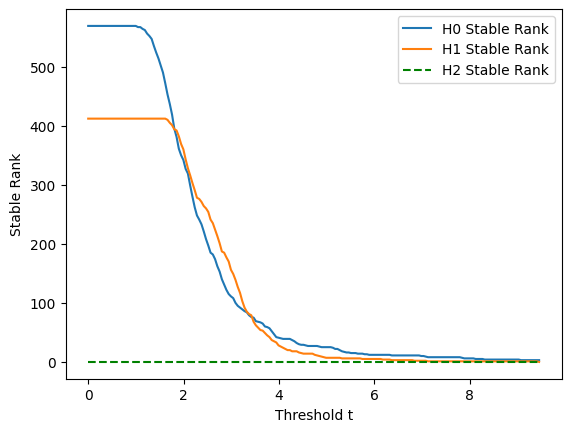

"\n# 4. Plot\nplt.plot(thresholds, srf_H0, label='H0 Stable Rank')\nplt.plot(thresholds, srf_H1, label='H1 Stable Rank')\nplt.xlabel('Threshold t')\nplt.ylabel('Stable Rank')\nplt.legend()\nplt.show()\n"

In [16]:
#STABLE RANK FUNCTION
import numpy as np
import matplotlib.pyplot as plt
from persim import plot_diagrams
from ripser import ripser
from sklearn.preprocessing import StandardScaler

# Assume you already did z-score and distance matrix
# data = your standardized cancer data

# 1. Compute persistent homology
diagrams = ripser(distance_matrix, distance_matrix=True)['dgms']


# 2. Define Stable Rank function
def stable_rank(diagram, thresholds, p=1):
    births = diagram[:, 0]
    deaths = diagram[:, 1]
    persistence = deaths - births
    return np.array([
        np.sum(persistence > (t - births)) for t in thresholds
    ])


#thresholds = np.linspace(0, np.max(diagrams[1]), 100)
thresholds = np.linspace(0, np.max(diagrams[1]), 200)
srf_H0 = stable_rank(diagrams[0], thresholds)
srf_H1 = stable_rank(diagrams[1], thresholds)
srf_H2 = stable_rank(diagrams[2], thresholds) if len(diagrams) > 2 else np.zeros_like(thresholds)

# 4. Plot
plt.plot(thresholds, srf_H0, label='H0 Stable Rank')
plt.plot(thresholds, srf_H1, label='H1 Stable Rank')
plt.plot(thresholds, srf_H2, label='H2 Stable Rank', linestyle='--', color='green')
plt.xlabel('Threshold t')
plt.ylabel('Stable Rank')
plt.legend()
plt.show()



"""
# 4. Plot
plt.plot(thresholds, srf_H0, label='H0 Stable Rank')
plt.plot(thresholds, srf_H1, label='H1 Stable Rank')
plt.xlabel('Threshold t')
plt.ylabel('Stable Rank')
plt.legend()
plt.show()
"""

In [17]:
diagramsh2 = ripser(distance_matrix, distance_matrix=True, maxdim=2)['dgms']
H2 = diagramsh2[2]
H0 = diagrams[0]
H1 = diagrams[1]

finite_H0 = H0[np.isfinite(H0[:,1])]
lifetimes_H0 = finite_H0[:,1] - finite_H0[:,0]

finite_H1 = H1[np.isfinite(H1[:,1])]
lifetimes_H1 = finite_H1[:,1] - finite_H1[:,0]


finite_H2 = H2[np.isfinite(H2[:,1])]
lifetimes_H2 = finite_H2[:,1] - finite_H2[:,0]

print("Number of finite H0 features:", len(lifetimes_H0))
print("Max persistence:", np.max(lifetimes_H0))
print("Mean persistence:", np.mean(lifetimes_H0))
print("------------------------------------------------")

print("Number of finite H1 features:", len(lifetimes_H1))
print("Max persistence:", np.max(lifetimes_H1))
print("Mean persistence:", np.mean(lifetimes_H1))
print("------------------------------------------------")

print("Number of finite H2 features:", len(lifetimes_H2))
print("Max persistence:", np.max(lifetimes_H2))
print("Mean persistence:", np.mean(lifetimes_H2))


Number of finite H0 features: 568
Max persistence: 12.299945831298828
Mean persistence: 2.47117742056578
------------------------------------------------
Number of finite H1 features: 412
Max persistence: 0.797605037689209
Mean persistence: 0.16989803227406103
------------------------------------------------
Number of finite H2 features: 173
Max persistence: 0.3564596176147461
Mean persistence: 0.07337746110265654


In [18]:
#Intervall till 8
import numpy as np
import matplotlib.pyplot as plt

# Define simple uniform distributions as intervals
intervals = [(0,2), (2,4), (4,6), (6,8)]
distributions = {f"{a}_{b}": (a,b) for (a,b) in intervals}

# Integrate the SRF over each interval (area under curve)
distribution_features = {}
for label, (a,b) in distributions.items():
    mask = (thresholds >= a) & (thresholds <= b)
    # Approximate area under SRF curve in this interval
    area_H0 = np.trapz(srf_H0[mask], thresholds[mask])
    area_H1 = np.trapz(srf_H1[mask], thresholds[mask])
    area_H2 = np.trapz(srf_H2[mask], thresholds[mask])
    distribution_features[label] = [area_H0, area_H1, area_H2]

print("Distribution-level SRF features:")
for k,v in distribution_features.items():
    print(k, "=> H0:", round(v[0],2), "H1:", round(v[1],2), "H2:", round(v[2],2))


Distribution-level SRF features:
0_2 => H0: 1052.13 H1: 814.39 H2: 0.0
2_4 => H0: 267.73 H1: 309.83 H2: 0.0
4_6 => H0: 46.54 H1: 20.64 H2: 0.0
6_8 => H0: 18.62 H1: 4.23 H2: 0.0


In [19]:
#Intervall till 12

import numpy as np
import matplotlib.pyplot as plt

# Define uniform threshold intervals up to 12
intervals = [(0,2), (2,4), (4,6), (6,8), (8,10), (10,12)]
distributions = {f"{a}_{b}": (a,b) for (a,b) in intervals}

# Integrate the SRF over each interval (area under curve)
distribution_features = {}
for label, (a,b) in distributions.items():
    mask = (thresholds >= a) & (thresholds <= b)
    # Approximate area under SRF curve in this interval
    area_H0 = np.trapz(srf_H0[mask], thresholds[mask])
    area_H1 = np.trapz(srf_H1[mask], thresholds[mask])
    area_H2 = np.trapz(srf_H2[mask], thresholds[mask])
    distribution_features[label] = [area_H0, area_H1, area_H2]

# Print results nicely
print("Distribution-level SRF features:")
for k,v in distribution_features.items():
    print(k, "=> H0:", round(v[0],2), "H1:", round(v[1],2), "H2:", round(v[2],2))


Distribution-level SRF features:
0_2 => H0: 1052.13 H1: 814.39 H2: 0.0
2_4 => H0: 267.73 H1: 309.83 H2: 0.0
4_6 => H0: 46.54 H1: 20.64 H2: 0.0
6_8 => H0: 18.62 H1: 4.23 H2: 0.0
8_10 => H0: 5.63 H1: 1.4 H2: 0.0
10_12 => H0: 0.0 H1: 0.0 H2: 0.0


Distribution-level Stable Rank Features:
[0.00, 2.00]  H0=1052.13,  H1=814.39,  H2=0.00
[2.00, 4.00]  H0=267.73,  H1=309.83,  H2=0.00
[4.00, 6.00]  H0=46.54,  H1=20.64,  H2=0.00
[6.00, 8.00]  H0=18.62,  H1=4.23,  H2=0.00
[8.00, 10.00]  H0=5.63,  H1=1.40,  H2=0.00
[10.00, 12.00]  H0=0.00,  H1=0.00,  H2=0.00


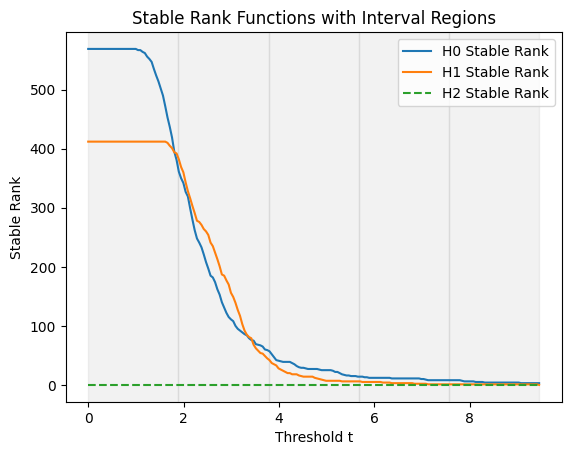

In [20]:
# Automatic interval generation
t_min, t_max = thresholds[0], thresholds[-1]
interval_edges = np.linspace(t_min, t_max, 6)  # 5 intervals
intervals = [(interval_edges[i], interval_edges[i+1]) for i in range(len(interval_edges)-1)]

# --- 6. Integrate the SRFs over each interval (area under the curve) ---
distribution_features = {}
for label, (a, b) in distributions.items():
    mask = (thresholds >= a) & (thresholds <= b)
    area_H0 = np.trapz(srf_H0[mask], thresholds[mask])
    area_H1 = np.trapz(srf_H1[mask], thresholds[mask])
    area_H2 = np.trapz(srf_H2[mask], thresholds[mask])
    distribution_features[label] = [area_H0, area_H1, area_H2]

# --- 7. Print the results ---
print("Distribution-level Stable Rank Features:")
for label, (a, b) in distributions.items():
    H0, H1, H2 = distribution_features[label]
    print(f"[{a:.2f}, {b:.2f}]  H0={H0:.2f},  H1={H1:.2f},  H2={H2:.2f}")

# --- 8. (Optional) Visualize the intervals on the SRF plot ---
plt.plot(thresholds, srf_H0, label='H0 Stable Rank')
plt.plot(thresholds, srf_H1, label='H1 Stable Rank')
plt.plot(thresholds, srf_H2, '--', label='H2 Stable Rank')
for a, b in intervals:
    plt.axvspan(a, b, color='grey', alpha=0.1)
plt.xlabel('Threshold t')
plt.ylabel('Stable Rank')
plt.legend()
plt.title("Stable Rank Functions with Interval Regions")
plt.show()


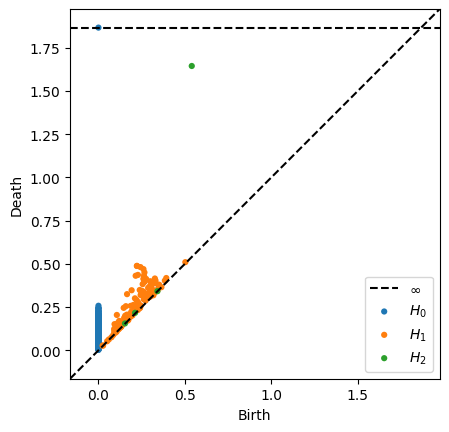

In [21]:
#För att kontrollera att koden inte gör fel, att H2 punkter faktiskt existerar
from ripser import ripser
import numpy as np
from persim import plot_diagrams

# Generate sphere (500 points)
phi = np.random.uniform(0, np.pi, 500)
theta = np.random.uniform(0, 2*np.pi, 500)
x = np.sin(phi) * np.cos(theta)
y = np.sin(phi) * np.sin(theta)
z = np.cos(phi)
sphere = np.vstack([x, y, z]).T

# Persistent homology up to H2
diagrams = ripser(sphere, maxdim=2)['dgms']
plot_diagrams(diagrams, show=True)


In [22]:
## Manhattan Distance

In [23]:
import numpy as np
from ripser import ripser
from scipy.spatial.distance import pdist, squareform

def compute_srf(data, maxdim=2, n_thresholds=200):
    # Compute pairwise distances
    distance_matrix = squareform(pdist(data, metric='euclidean'))
    
    # Persistent homology
    diagrams = ripser(distance_matrix, distance_matrix=True, maxdim=maxdim)['dgms']
    
    # Define stable rank function
    def stable_rank(diagram, thresholds):
        births = diagram[:, 0]
        deaths = diagram[:, 1]
        persistence = deaths - births
        return np.array([
            np.sum(persistence > (t - births)) for t in thresholds
        ])
    
    # Define thresholds
    thresholds = np.linspace(0, np.max(diagrams[1]), n_thresholds)
    
    # Compute SRFs
    srf_H0 = stable_rank(diagrams[0], thresholds)
    srf_H1 = stable_rank(diagrams[1], thresholds)
    srf_H2 = stable_rank(diagrams[2], thresholds) if len(diagrams) > 2 else np.zeros_like(thresholds)
    
    return srf_H0, srf_H1, srf_H2, thresholds


In [27]:
# Split data into classes (remove non-numeric column first if needed)
cancer_data = pd.read_csv("Cancer_Data.csv")
X = cancer_data.drop(columns=['diagnosis'])
X_benign = X[cancer_data['diagnosis'] == 'B']
X_malignant = X[cancer_data['diagnosis'] == 'M']


In [28]:
# Compute srf for each class
srfB_H0, srfB_H1, srfB_H2, thresholds = compute_srf(X_benign)
srfM_H0, srfM_H1, srfM_H2, thresholds = compute_srf(X_malignant)


In [29]:
#Compute L1 distances
from numpy import trapz, abs

L1_H0 = trapz(abs(srfB_H0 - srfM_H0), thresholds)
L1_H1 = trapz(abs(srfB_H1 - srfM_H1), thresholds)
L1_H2 = trapz(abs(srfB_H2 - srfM_H2), thresholds)

print("L₁ Distances between Benign and Malignant SRFs:")
print(f"H₀ (Connectivity): {L1_H0:.2f}")
print(f"H₁ (Loops): {L1_H1:.2f}")
print(f"H₂ (Voids): {L1_H2:.2f}")


L₁ Distances between Benign and Malignant SRFs:
H₀ (Connectivity): 144853.93
H₁ (Loops): 13056.16
H₂ (Voids): 0.00


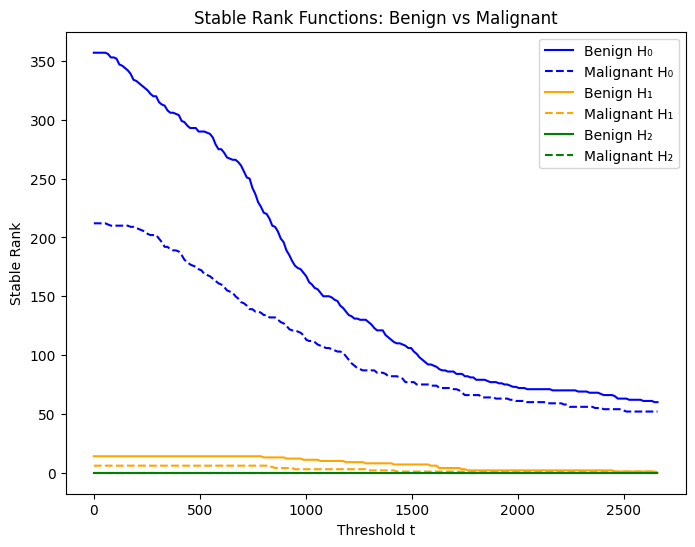

In [ ]:
#Visualize srf side by side
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.plot(thresholds, srfB_H0, label='Benign H₀', color='blue')
plt.plot(thresholds, srfM_H0, label='Malignant H₀', color='blue', linestyle='--')
plt.plot(thresholds, srfB_H1, label='Benign H₁', color='orange')
plt.plot(thresholds, srfM_H1, label='Malignant H₁', color='orange', linestyle='--')
plt.plot(thresholds, srfB_H2, label='Benign H₂', color='green')
plt.plot(thresholds, srfM_H2, label='Malignant H₂', color='green', linestyle='--')

plt.xlabel("Threshold t")
plt.ylabel("Stable Rank")
plt.title("Stable Rank Functions: Benign vs Malignant")
plt.legend()
plt.show()


## Classification and analysis (K-NN)

Number of NaNs after cleaning: 0

🧾 KNN Classification Report (TDA-based features):
              precision    recall  f1-score   support

           0       0.68      0.76      0.72        71
           1       0.51      0.42      0.46        43

    accuracy                           0.63       114
   macro avg       0.60      0.59      0.59       114
weighted avg       0.62      0.63      0.62       114

✅ Accuracy: 0.6316


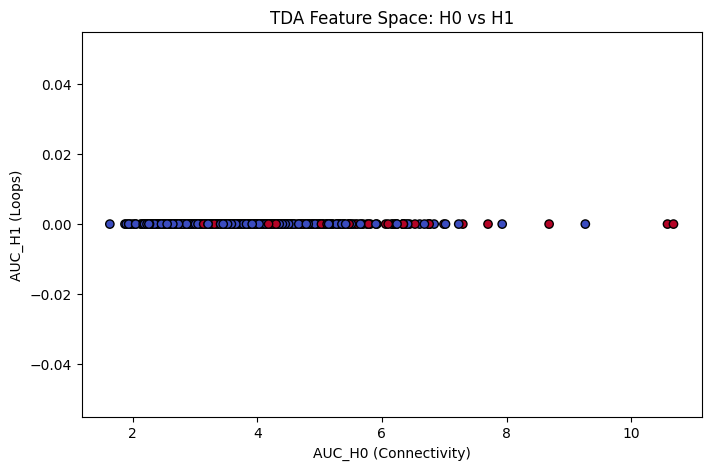

In [34]:
# ============================================
# 🧠 Topological Data Analysis + KNN Classifier
# ============================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from scipy.spatial.distance import pdist, squareform
from ripser import ripser
from numpy import trapz

# ============================================
# 1️⃣ Load and preprocess the dataset
# ============================================

# Load your dataset (make sure the filename is correct)
cancer_data = pd.read_csv("Cancer_Data.csv")

# Separate features and labels
X = cancer_data.drop(columns=["diagnosis"])
y = np.where(cancer_data["diagnosis"] == "M", 1, 0)  # 1 = malignant, 0 = benign

# Z-score normalization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ============================================
# 2️⃣ Define helper: compute TDA-based features
# ============================================

def compute_tda_features(sample_vector):
    # Reshape to (n, 1) for distance calculation
    sample = sample_vector.reshape(-1, 1)
    distance_matrix = squareform(pdist(sample, metric="euclidean"))

    # Compute persistent homology
    diagrams = ripser(distance_matrix, distance_matrix=True)["dgms"]

    # Define Stable Rank function
    def stable_rank(diagram, thresholds):
        if len(diagram) == 0:
            return np.zeros_like(thresholds)
        births = diagram[:, 0]
        deaths = diagram[:, 1]
        persistence = deaths - births
        return np.array([
            np.sum(persistence > (t - births)) for t in thresholds
        ])

    # Define threshold range
    try:
        max_val = np.max(diagrams[0])
        if not np.isfinite(max_val) or max_val <= 0:
            max_val = 1.0
    except:
        max_val = 1.0

    thresholds = np.linspace(0, max_val, 100)

    # Compute SRFs
    srf_H0 = stable_rank(diagrams[0], thresholds)
    srf_H1 = stable_rank(diagrams[1], thresholds) if len(diagrams) > 1 else np.zeros_like(thresholds)
    srf_H2 = stable_rank(diagrams[2], thresholds) if len(diagrams) > 2 else np.zeros_like(thresholds)

    # Compute areas under SRF curves (AUCs)
    AUC_H0 = trapz(srf_H0, thresholds)
    AUC_H1 = trapz(srf_H1, thresholds)
    AUC_H2 = trapz(srf_H2, thresholds)

    return np.array([AUC_H0, AUC_H1, AUC_H2])

# ============================================
# 3️⃣ Compute TDA features for all samples
# ============================================

tda_features = np.array([
    compute_tda_features(X_scaled[i, :])
    for i in range(X_scaled.shape[0])
])

# Replace NaN or inf values with 0
tda_features = np.nan_to_num(tda_features, nan=0.0, posinf=0.0, neginf=0.0)

# Optional: check for any remaining NaNs
print("Number of NaNs after cleaning:", np.isnan(tda_features).sum())

# ============================================
# 4️⃣ Split dataset and scale for KNN
# ============================================

X_train, X_test, y_train, y_test = train_test_split(
    tda_features, y, test_size=0.2, random_state=42
)

scaler_tda = StandardScaler()
X_train = scaler_tda.fit_transform(X_train)
X_test = scaler_tda.transform(X_test)

# ============================================
# 5️⃣ Train KNN classifier
# ============================================

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# ============================================
# 6️⃣ Evaluate performance
# ============================================

y_pred = knn.predict(X_test)

print("\n🧾 KNN Classification Report (TDA-based features):")
print(classification_report(y_test, y_pred))
print("✅ Accuracy:", round(accuracy_score(y_test, y_pred), 4))

# ============================================
# 7️⃣ Optional: visualize feature distributions
# ============================================

plt.figure(figsize=(8,5))
plt.scatter(tda_features[:,0], tda_features[:,1],
            c=y, cmap="coolwarm", edgecolor='k')
plt.xlabel("AUC_H0 (Connectivity)")
plt.ylabel("AUC_H1 (Loops)")
plt.title("TDA Feature Space: H0 vs H1")
plt.show()
